# 1. Merge data

In [1]:
import pandas as pd
import os
os.listdir()

['quiz_1.ipynb', '.ipynb_checkpoints']

## 1.1 Easy merge: When both data sets are panel

### 1.1.1 Data set 1

In [2]:
df_agri = pd.read_csv(
    # ADD YOUR CODE HERE: Import Agriculture_data.csv quiz folder in the data examples directory
    )
df_agri = df_agri.rename(columns={'code': 'country'})
df_agri.head(2)

,country,year,FarmCredit,ICTPolicy,ProductionValue,ProcessingValue,Fertilizer
0,BGD,2000,NaN,NaN,583661.0,NaN,158.108
1,BGD,2001,NaN,NaN,590372.0,NaN,174.590


### 1.1.2 Data set 2

In [3]:
df_con = pd.read_csv(
    # ADD YOUR CODE HERE: Import control_var.csv quiz folder in the data examples directory

)
df_con = df_con.drop(['country'], axis = 'columns').rename(columns={'code': 'country'})
df_con.head(2)

,country,year,"Fertility rate, total (births per woman)","GDP per capita, PPP (constant 2021 international $)","Life expectancy at birth, total (years)","Mortality rate, infant (per 1,000 live births)",Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Poverty headcount ratio at national poverty lines (% of population),Rural population (% of total population),Urban population (% of total population)
0,BGD,1960,6.742,NaN,43.980,178.6,NaN,NaN,51828660.0,NaN,94.865,5.135
1,BGD,1961,6.780,NaN,44.887,173.3,409.544042,2.818718,53310348.0,NaN,94.722,5.278


### 1.1.M Merge

### Merge by Index

- Shown in these notebooks:
    - https://github.com/Data-Science-Public-Policy/graspp_2025_spring/blob/main/notebooks/module_1/week_2/download_api.ipynb
    - https://github.com/Data-Science-Public-Policy/graspp_2025_spring/blob/main/notebooks/module_1/week_3/building_python_files.ipynb

In [4]:
df_merge = pd.merge(
    # ADD YOUR CODE HERE: DF 1,
    # ADD YOUR CODE HERE: DF 2,
    right_index = True,
    left_index = True
)
df_merge.head(2)

FarmCredit  ICTPolicy  ProductionValue  ProcessingValue  \
country year                                                            
BGD     2000         NaN        NaN         583661.0              NaN   
        2001         NaN        NaN         590372.0              NaN   

              Fertilizer  Fertility rate, total (births per woman)  \
country year                                                         
BGD     2000     158.108                                     3.279   
        2001     174.590                                     3.203   

              GDP per capita, PPP (constant 2021 international $)  \
country year                                                        
BGD     2000                                        2712.935122     
        2001                                        2803.554720     

              Life expectancy at birth, total (years)  \
country year                                            
BGD     2000                                   62.049   
        2001                                   62.836   

              Mortality rate, infant (per 1,000 live births)  \
country year                                                   
BGD     2000                                            59.8   
        2001                                            56.6   

              Population density (people per sq. km of land area)  \
country year                                                        
BGD     2000                                        1033.604548     
        2001                                        1050.978029     

              Population growth (annual %)  Population, total  \
country year                                                    
BGD     2000                      1.827328        134544304.0   
        2001                      1.666893        136805810.0   

              Poverty headcount ratio at national poverty lines (% of population)  \
country year                                                                        
BGD     2000                                                NaN                     
        2001                                                NaN                     

              Rural population (% of total population)  \
country year                                             
BGD     2000                                    76.410   
        2001                                    75.904   

              Urban population (% of total population)  
country year                                            
BGD     2000                                    23.590  
        2001                                    24.096

### Merge by Column name(s)

In [5]:
df_merge = pd.merge(
    df_agri,
    df_con,
    on = [
        # ADD YOUR CODE HERE
    ]
)
df_merge.head(2)

,country,year,FarmCredit,ICTPolicy,ProductionValue,ProcessingValue,Fertilizer,"Fertility rate, total (births per woman)","GDP per capita, PPP (constant 2021 international $)","Life expectancy at birth, total (years)","Mortality rate, infant (per 1,000 live births)",Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Poverty headcount ratio at national poverty lines (% of population),Rural population (% of total population),Urban population (% of total population)
0,BGD,2000,NaN,NaN,583661.0,NaN,158.108,3.279,2712.935122,62.049,59.8,1033.604548,1.827328,134544304.0,NaN,76.410,23.590
1,BGD,2001,NaN,NaN,590372.0,NaN,174.590,3.203,2803.554720,62.836,56.6,1050.978029,1.666893,136805810.0,NaN,75.904,24.096


# 2. Descriptive Stats

## 2.A Write function to output basic statistics of the data frame

- Similar example shown in B.4 of the following notebook
    - https://github.com/Data-Science-Public-Policy/graspp_2025_spring/blob/main/notebooks/module_1/week_1/notebook_basics.ipynb


In [6]:
def basic_stats(df):
    countries = # ADD YOUR CODE HERE: List unique countries
    n_countries = # ADD YOUR CODE HERE: Count countries
    time_series = f"{df.year.min()} ~ {df.year.max()}"
    data_summary = df.drop(['country','year'], axis=1).notna().sum()
    col_type = #ADD YOUR CODE HERE: data types
    
    return {
        'countries (first 5)': countries[:5],
        'country_count': n_countries,
        'time_series': time_series,
        'observations_bycolumn': data_summary,
        'col_type' : col_type
    }

## 2.1 Data 1

In [7]:
basic_stats(
    df_agri
)

{'countries (first 5)': ['BGD', 'BRN', 'BTN', 'IDN', 'IND'],
 'country_count': 16,
 'time_series': '2000 ~ 2023',
 'observations_bycolumn': FarmCredit          68
 ICTPolicy           34
 ProductionValue     99
 ProcessingValue    111
 Fertilizer          64
 dtype: int64,
 'col_type': country             object
 year                 int64
 FarmCredit         float64
 ICTPolicy          float64
 ProductionValue    float64
 ProcessingValue    float64
 Fertilizer         float64
 dtype: object}

## 2.2 Data 2

In [8]:
basic_stats(
    df_con
)

{'countries (first 5)': ['BGD', 'BTN', 'BRN', 'KHM', 'IND'],
 'country_count': 16,
 'time_series': '1960 ~ 2023',
 'observations_bycolumn': Fertility rate, total (births per woman)                               1024
 GDP per capita, PPP (constant 2021 international $)                     543
 Life expectancy at birth, total (years)                                1024
 Mortality rate, infant (per 1,000 live births)                          970
 Population density (people per sq. km of land area)                     992
 Population growth (annual %)                                           1008
 Population, total                                                      1024
 Poverty headcount ratio at national poverty lines (% of population)      89
 Rural population (% of total population)                               1024
 Urban population (% of total population)                               1024
 dtype: int64,
 'col_type': country                                                        

# 3. Viz

In [9]:
df_merge = pd.merge(
    df_agri,
    df_con,
    on = ['country','year']
)
df_merge = df_merge.rename(columns = {"GDP per capita, PPP (constant 2021 international $)": 'gdp', "ICTPolicy" : 'ict'})
df_merge.head(2)

,country,year,FarmCredit,ict,ProductionValue,ProcessingValue,Fertilizer,"Fertility rate, total (births per woman)",gdp,"Life expectancy at birth, total (years)","Mortality rate, infant (per 1,000 live births)",Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Poverty headcount ratio at national poverty lines (% of population),Rural population (% of total population),Urban population (% of total population)
0,BGD,2000,NaN,NaN,583661.0,NaN,158.108,3.279,2712.935122,62.049,59.8,1033.604548,1.827328,134544304.0,NaN,76.410,23.590
1,BGD,2001,NaN,NaN,590372.0,NaN,174.590,3.203,2803.554720,62.836,56.6,1050.978029,1.666893,136805810.0,NaN,75.904,24.096


## 3.1 Basic line plot with country BGD and IDN

- lineplots shown in the following notebook:
    - https://github.com/Data-Science-Public-Policy/graspp_2025_spring/blob/main/notebooks/module_2/week_4/visualization_basics.ipynb
    - `sns.scatterplot` has the exact same arguments as `sns.lineplot`

<Axes: xlabel='year', ylabel='gdp'>

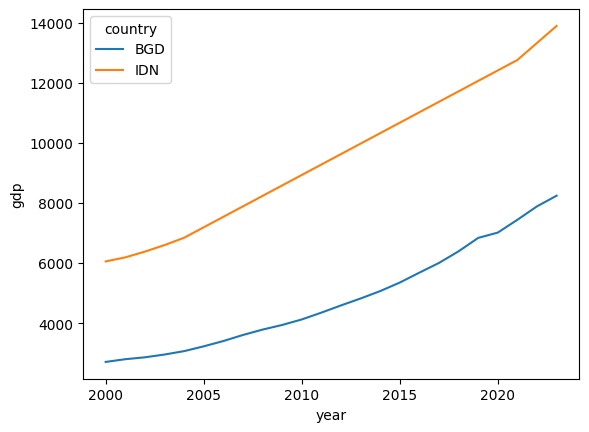

In [10]:
import seaborn as sns
sns.lineplot(
        data = #ADD YOUR CODE HERE: Must reset index and query
        x = #ADD YOUR CODE HERE
        y = #ADD YOUR CODE HERE
        hue = 'country'
    )

## 3.2 Scatter

- `sns.scatterplot` has the exact same arguments as `sns.lineplot`

<Axes: xlabel='ict', ylabel='gdp'>

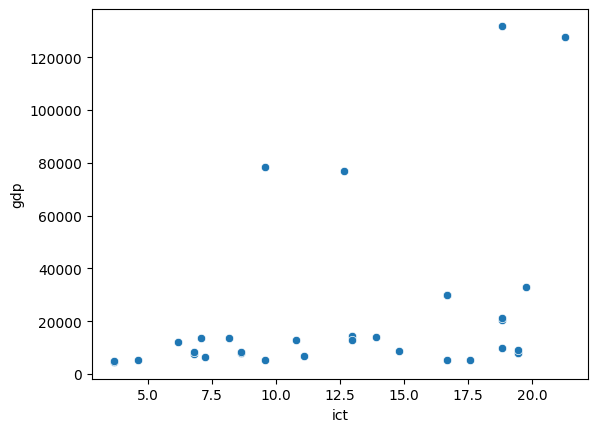

In [11]:
sns.scatterplot(
        data = df_merge,
        x = #ADD YOUR CODE HERE
        y = #ADD YOUR CODE HERE
    )

## 3.3 Scatter with function

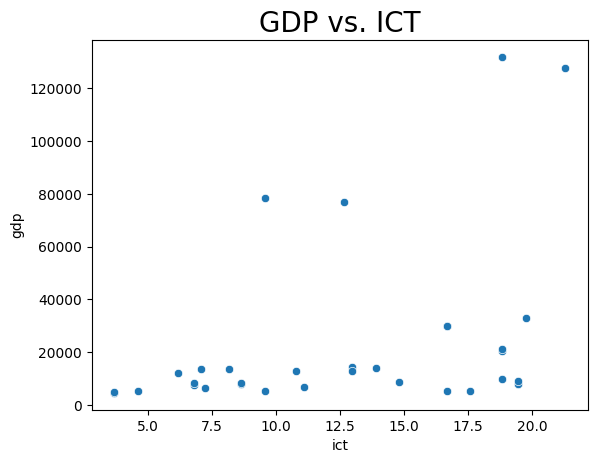

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

def scatter(df, col_x, col_y, title):
    #ADD YOUR CODE HERE
    plt.title(title, size = 20)

scatter(
    df = df_merge,
    col_x = 'ict',
    col_y = 'gdp',
    title = 'GDP vs. ICT'
    
)

# 4. Regression

## 4.1 Create new df with only 2023, cols (gdp, ict) and set index country year

In [13]:
df_feat = df_merge.set_index(['country','year']).query("year == 2023")[['gdp', 'ict']]
df_feat.head(2)

,,gdp,ict
country,year,,
BGD,2023,8242.397990,6.79012
BRN,2023,76828.399831,12.65430


## 4.2 Transform

In [15]:
import numpy as np
df_feat['gdp_log'] = ##ADD YOUR CODE HERE
df_feat['ict_log'] = #ADD YOUR CODE HERE
df_feat.head(2)

,,gdp,ict,gdp_log,ict_log
country,year,,,,
BGD,2023,8242.397990,6.79012,9.017047,1.915469
BRN,2023,76828.399831,12.65430,11.249330,2.537997


## 4.3 Regression

In [16]:
data = df_feat[['gdp_log', 'ict_log']].dropna()
data.head(2)

,,gdp_log,ict_log
country,year,,
BGD,2023,9.017047,1.915469
BRN,2023,11.249330,2.537997


### 4.3.1 Histograms

<Axes: xlabel='gdp_log', ylabel='Count'>

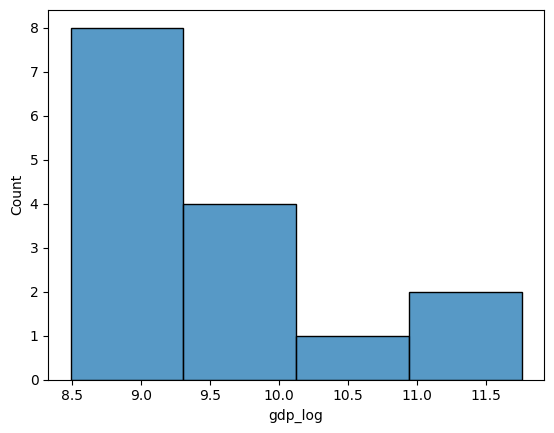

In [17]:
sns.histplot(
    data = data,
    x = # ADD YOUR CODE HERE
    bins = 4
)

### 4.3.2 Regression

In [18]:
data = df_feat[['gdp_log', 'ict_log']].dropna()
data.head(2)

,,gdp_log,ict_log
country,year,,
BGD,2023,9.017047,1.915469
BRN,2023,11.249330,2.537997


In [19]:
import statsmodels.api as sm

y = data['gdp_log']
x = data['ict_log']
reg = # ADD YOUR CODE HERE
reg.summary()

/Users/corybaird/Desktop/graspp_2025_spring/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                gdp_log   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              495.9
Date:                Sun, 25 May 2025   Prob (F-statistic):                    2.49e-12
Time:                        17:05:45   Log-Likelihood:                         -28.187
No. Observations:                  15   AIC:                                      58.37
Df Residuals:                      14   BIC:                                      59.08
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ict_log        3.7098      0.167     22.270      0.000       3.353       4.067
==============================================================================
Omnibus:                        0.827   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.724
Skew:                           0.452   Prob(JB):                        0.696
Kurtosis:                       2.417   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""